In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [96]:
#load and investigate the data
tennis_players_stats = pd.read_csv('tennis_stats.csv')
print(tennis_players_stats.head())
print(tennis_players_stats.columns)
print(tennis_players_stats.describe())
print(tennis_players_stats.isna())
print(tennis_players_stats.isna().sum())
print(tennis_players_stats.dtypes)
print(tennis_players_stats.duplicated())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

                                Year  FirstServe  FirstServePointsWon  \
Year                        1.000000    0.051406            -0.016728   
FirstServe                  0.051406    1.000000            -0.070659   
FirstServePointsWon        -0.016728   -0.070659             1.000000   
FirstServeReturnPointsWon  -0.106784    0.025488             0.021729   
SecondServePointsWon        0.005300    0.101417             0.320765   
SecondServeReturnPointsWon -0.039087   -0.001924            -0.004724   
Aces                       -0.108367    0.048149             0.460323   
BreakPointsConverted       -0.072404   -0.018877            -0.041538   
BreakPointsFaced           -0.101735    0.057709             0.301925   
BreakPointsOpportunities   -0.114806    0.062345             0.324853   
BreakPointsSaved           -0.006154    0.087945             0.405751   
DoubleFaults               -0.071885   -0.005477             0.373321   
ReturnGamesPlayed          -0.108405    0.071776   

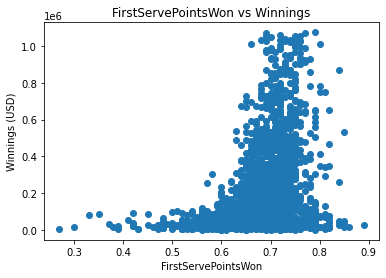

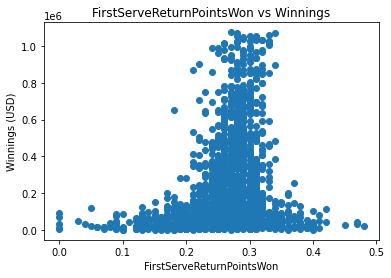

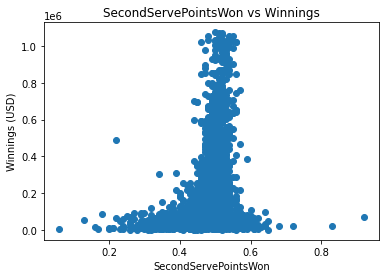

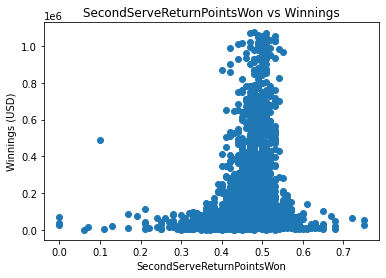

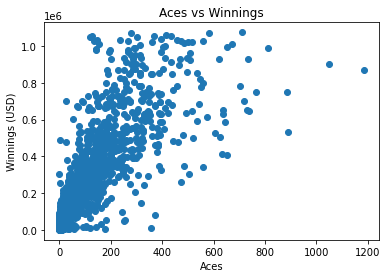

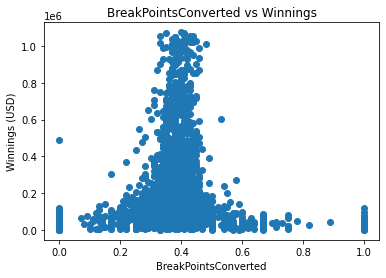

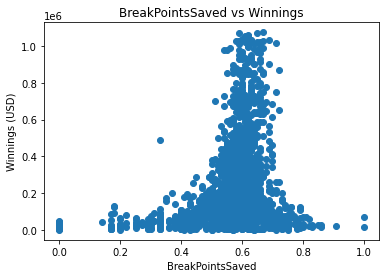

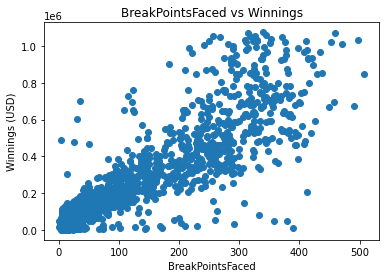

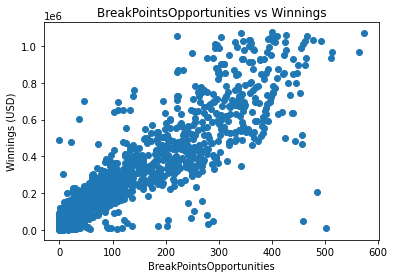

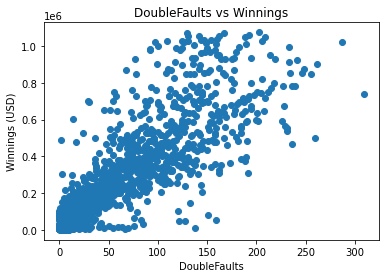

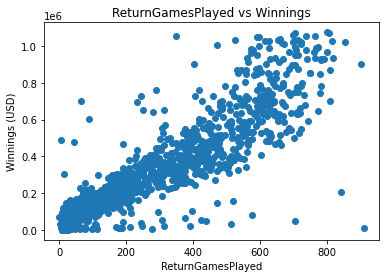

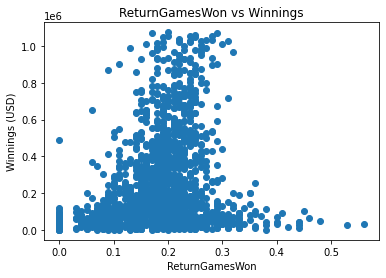

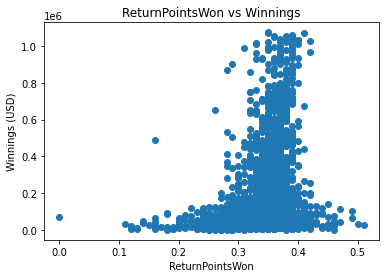

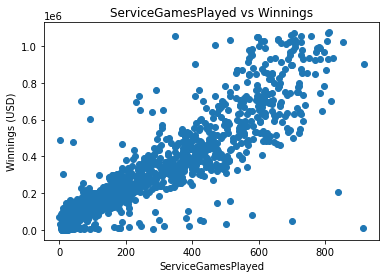

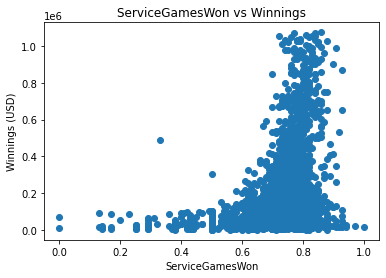

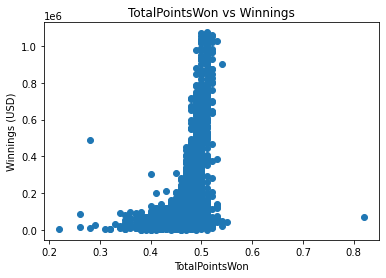

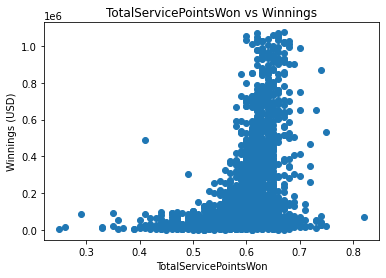

<Figure size 432x288 with 0 Axes>

In [97]:
#exploratory analysis
print(tennis_players_stats.corr())

plt.scatter(tennis_players_stats['FirstServePointsWon'],tennis_players_stats['Winnings'])
plt.title('FirstServePointsWon vs Winnings')
plt.xlabel('FirstServePointsWon')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['FirstServeReturnPointsWon'],tennis_players_stats['Winnings'])
plt.title('FirstServeReturnPointsWon vs Winnings')
plt.xlabel('FirstServeReturnPointsWon')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['SecondServePointsWon'],tennis_players_stats['Winnings'])
plt.title('SecondServePointsWon vs Winnings')
plt.xlabel('SecondServePointsWon')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['SecondServeReturnPointsWon'],tennis_players_stats['Winnings'])
plt.title('SecondServeReturnPointsWon vs Winnings')
plt.xlabel('SecondServeReturnPointsWon')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['Aces'],tennis_players_stats['Winnings'])
plt.title('Aces vs Winnings')
plt.xlabel('Aces')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['BreakPointsConverted'],tennis_players_stats['Winnings'])
plt.title('BreakPointsConverted vs Winnings')
plt.xlabel('BreakPointsConverted')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['BreakPointsSaved'],tennis_players_stats['Winnings'])
plt.title('BreakPointsSaved vs Winnings')
plt.xlabel('BreakPointsSaved')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['BreakPointsFaced'],tennis_players_stats['Winnings'])
plt.title('BreakPointsFaced vs Winnings')
plt.xlabel('BreakPointsFaced')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf() 

plt.scatter(tennis_players_stats['BreakPointsOpportunities'],tennis_players_stats['Winnings'])
plt.title('BreakPointsOpportunities vs Winnings')
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['DoubleFaults'],tennis_players_stats['Winnings'])
plt.title('DoubleFaults vs Winnings')
plt.xlabel('DoubleFaults')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['ReturnGamesPlayed'],tennis_players_stats['Winnings'])
plt.title('ReturnGamesPlayed vs Winnings')
plt.xlabel('ReturnGamesPlayed')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['ReturnGamesWon'],tennis_players_stats['Winnings'])
plt.title('ReturnGamesWon vs Winnings')
plt.xlabel('ReturnGamesWon')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['ReturnPointsWon'],tennis_players_stats['Winnings'])
plt.title('ReturnPointsWon vs Winnings')
plt.xlabel('ReturnPointsWon')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()


plt.scatter(tennis_players_stats['ServiceGamesPlayed'],tennis_players_stats['Winnings'])
plt.title('ServiceGamesPlayed vs Winnings')
plt.xlabel('ServiceGamesPlayed')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['ServiceGamesWon'],tennis_players_stats['Winnings'])
plt.title('ServiceGamesWon vs Winnings')
plt.xlabel('ServiceGamesWon')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['TotalPointsWon'],tennis_players_stats['Winnings'])
plt.title('TotalPointsWon vs Winnings')
plt.xlabel('TotalPointsWon')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['TotalServicePointsWon'],tennis_players_stats['Winnings'])
plt.title('TotalServicePointsWon vs Winnings')
plt.xlabel('TotalServicePointsWon')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

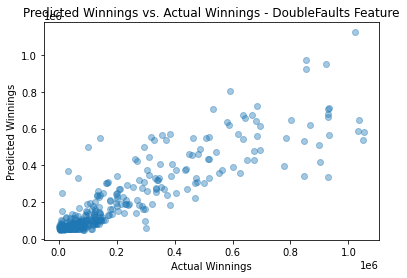

Predicting Winnings with DoubleFaults, Train Score: 0.7210639313871812
Predicting Winnings with DoubleFaults, Test Score: 0.765766497940146


<Figure size 432x288 with 0 Axes>

In [98]:
##select features and value to predict
#single feature linear regression (DoubleFaults)
feature = tennis_players_stats[['DoubleFaults']]
winnings = tennis_players_stats['Winnings']

#train, test, split the data
feature_train, feature_test, winnings_train, winnings_test = train_test_split(feature, winnings, train_size = 0.8)

#create and train model on training data
model = LinearRegression()
model.fit(feature_train, winnings_train)

#make predictions with model
winnings_predicted = model.predict(feature_test)

#plot predicted winnings vs actual winnings
plt.scatter(winnings_test, winnings_predicted, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - DoubleFaults Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

##evaluating model's accuracy
#score model on train data
print('Predicting Winnings with DoubleFaults, Train Score:', model.score(feature_train, winnings_train))

#score model on test data
print('Predicting Winnings with DoubleFaults, Test Score:', model.score(feature_test, winnings_test))

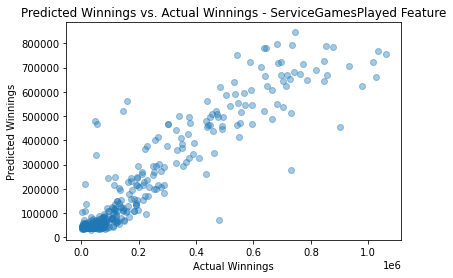

Predicting Winnings with ServiceGamesPlayed, Train Score: 0.8289038181426909
Predicting Winnings with ServiceGamesPlayed, Test Score: 0.8523567324407273


<Figure size 432x288 with 0 Axes>

In [84]:
#single feature linear regression (ServiceGamesPlayed)
feature = tennis_players_stats[['ServiceGamesPlayed']]
winnings = tennis_players_stats['Winnings']

#train, test, split the data
feature_train, feature_test, winnings_train, winnings_test = train_test_split(feature, winnings, train_size = 0.8)

#create and train model on training data
model = LinearRegression()
model.fit(feature_train, winnings_train)

#make predictions with model
winnings_predicted = model.predict(feature_test)

#plot predicted winnings vs actual winnings
plt.scatter(winnings_test, winnings_predicted, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - ServiceGamesPlayed Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

##evaluating model's accuracy
#score model on train data
print('Predicting Winnings with ServiceGamesPlayed, Train Score:', model.score(feature_train, winnings_train))

#score model on test data
print('Predicting Winnings with ServiceGamesPlayed, Test Score:', model.score(feature_test, winnings_test))

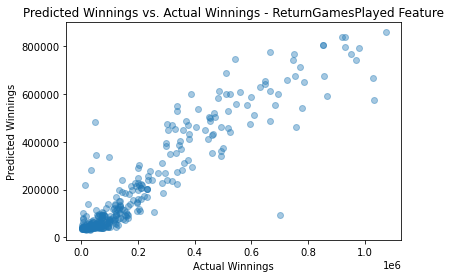

Predicting Winnings with ReturnGamesPlayed, Train Score: 0.8248031278276444
Predicting Winnings with ReturnGamesPlayed, Test Score: 0.8664924928780185


<Figure size 432x288 with 0 Axes>

In [85]:
#single feature linear regression (ReturnGamesPlayed)
feature = tennis_players_stats[['ReturnGamesPlayed']]
winnings = tennis_players_stats['Winnings']

#train, test, split the data
feature_train, feature_test, winnings_train, winnings_test = train_test_split(feature, winnings, train_size = 0.8)

#create and train model on training data
model = LinearRegression()
model.fit(feature_train, winnings_train)

#make predictions with model
winnings_predicted = model.predict(feature_test)

#plot predicted winnings vs actual winnings
plt.scatter(winnings_test, winnings_predicted, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - ReturnGamesPlayed Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

##evaluating model's accuracy
#score model on train data
print('Predicting Winnings with ReturnGamesPlayed, Train Score:', model.score(feature_train, winnings_train))

#score model on test data
print('Predicting Winnings with ReturnGamesPlayed, Test Score:', model.score(feature_test, winnings_test))

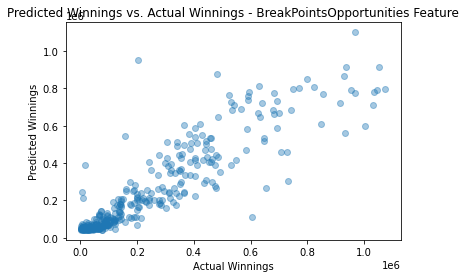

Predicting Winnings with BreakPointsOpportunities, Train Score: 0.8125631780742372
Predicting Winnings with BreakPointsOpportunities, Test Score: 0.8024882240294844


<Figure size 432x288 with 0 Axes>

In [86]:
#single feature linear regression (BreakPointsOpportunities)
feature = tennis_players_stats[['BreakPointsOpportunities']]
winnings = tennis_players_stats['Winnings']

#train, test, split the data
feature_train, feature_test, winnings_train, winnings_test = train_test_split(feature, winnings, train_size = 0.8)

#create and train model on training data
model = LinearRegression()
model.fit(feature_train, winnings_train)

#make predictions with model
winnings_predicted = model.predict(feature_test)

#plot predicted winnings vs actual winnings
plt.scatter(winnings_test, winnings_predicted, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - BreakPointsOpportunities Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

##evaluating model's accuracy
#score model on train data
print('Predicting Winnings with BreakPointsOpportunities, Train Score:', model.score(feature_train, winnings_train))

#score model on test data
print('Predicting Winnings with BreakPointsOpportunities, Test Score:', model.score(feature_test, winnings_test))

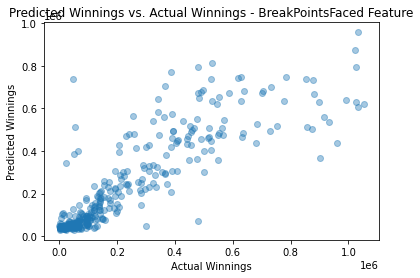

Predicting Winnings with BreakPointsFaced, Train Score: 0.7740785184392592
Predicting Winnings with BreakPointsFaced, Test Score: 0.7395252096412331


<Figure size 432x288 with 0 Axes>

In [87]:
#single feature linear regression (BreakPointsFaced)
feature = tennis_players_stats[['BreakPointsFaced']]
winnings = tennis_players_stats['Winnings']

#train, test, split the data
feature_train, feature_test, winnings_train, winnings_test = train_test_split(feature, winnings, train_size = 0.8)

#create and train model on training data
model = LinearRegression()
model.fit(feature_train, winnings_train)

#make predictions with model
winnings_predicted = model.predict(feature_test)

#plot predicted winnings vs actual winnings
plt.scatter(winnings_test, winnings_predicted, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - BreakPointsFaced Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

##evaluating model's accuracy
#score model on train data
print('Predicting Winnings with BreakPointsFaced, Train Score:', model.score(feature_train, winnings_train))

#score model on test data
print('Predicting Winnings with BreakPointsFaced, Test Score:', model.score(feature_test, winnings_test))

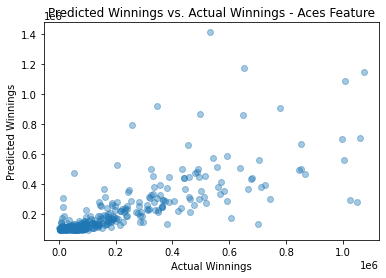

Predicting Winnings with Aces, Train Score: 0.6482771254610465
Predicting Winnings with Aces, Test Score: 0.5711446290145394


<Figure size 432x288 with 0 Axes>

In [88]:
#single feature linear regression (Aces)
feature = tennis_players_stats[['Aces']]
winnings = tennis_players_stats['Winnings']

#train, test, split the data
feature_train, feature_test, winnings_train, winnings_test = train_test_split(feature, winnings, train_size = 0.8)

#create and train model on training data
model = LinearRegression()
model.fit(feature_train, winnings_train)

#make predictions with model
winnings_predicted = model.predict(feature_test)

#plot predicted winnings vs actual winnings
plt.scatter(winnings_test, winnings_predicted, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Aces Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

##evaluating model's accuracy
#score model on train data
print('Predicting Winnings with Aces, Train Score:', model.score(feature_train, winnings_train))

#score model on test data
print('Predicting Winnings with Aces, Test Score:', model.score(feature_test, winnings_test))

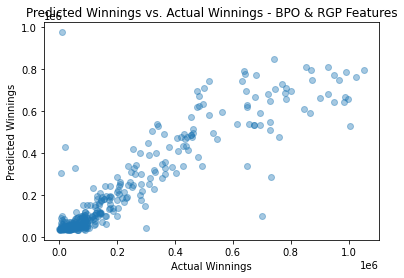

Predicting Winnings with BreakPointsOpportunities & ReturnGamesPlayed, Train Score: 0.8399740568621109
Predicting Winnings with BreakPointsOpportunities & ReturnGamesPlayed, Test Score: 0.8127625203889721
Coefficient: [331.31388955 858.40163069]


<Figure size 432x288 with 0 Axes>

In [89]:
#two-feature linear regression on the defensive (BreakPointsOpportunities & ReturnGamesPlayed)
features = tennis_players_stats[['BreakPointsOpportunities', 'ReturnGamesPlayed']]
winnings = tennis_players_stats['Winnings']

#train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

#create and train model on training data
model = LinearRegression()
model.fit(features_train, winnings_train)

#make predictions with model
winnings_predicted = model.predict(features_test)

#plot predicted winnings vs actual winnings
plt.scatter(winnings_test, winnings_predicted, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - BPO & RGP Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

##evaluating model's accuracy
#score model on train data
print('Predicting Winnings with BreakPointsOpportunities & ReturnGamesPlayed, Train Score:', model.score(features_train, winnings_train))

#score model on test data
print('Predicting Winnings with BreakPointsOpportunities & ReturnGamesPlayed, Test Score:', model.score(features_test, winnings_test))

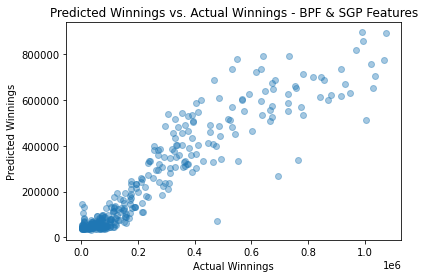

Predicting Winnings with BreakPointsFaced & ServiceGamesPlayed, Train Score: 0.828626075774672
Predicting Winnings with BreakPointsFaced & ServiceGamesPlayed, Test Score: 0.8586347801969239
Coefficient: [-294.44006124 1183.90297401]


<Figure size 432x288 with 0 Axes>

In [90]:
#two-feature linear regression on the offensive (BreakPointsFaced & ServiceGamesPlayed)
features = tennis_players_stats[['BreakPointsFaced', 'ServiceGamesPlayed']]
winnings = tennis_players_stats['Winnings']

#train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

#create and train model on training data
model = LinearRegression()
model.fit(features_train, winnings_train)

#make predictions with model
winnings_predicted = model.predict(features_test)

#plot predicted winnings vs actual winnings
plt.scatter(winnings_test, winnings_predicted, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - BPF & SGP Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

##evaluating model's accuracy
#score model on train data
print('Predicting Winnings with BreakPointsFaced & ServiceGamesPlayed, Train Score:', model.score(features_train, winnings_train))

#score model on test data
print('Predicting Winnings with BreakPointsFaced & ServiceGamesPlayed, Test Score:', model.score(features_test, winnings_test))

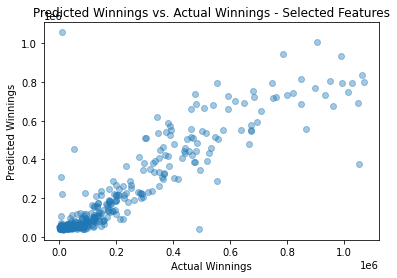

Predicting Winnings with Selected Features, Train Score: 0.8493511673701956
Predicting Winnings with Selected Features, Test Score: 0.8061884091787863


<Figure size 432x288 with 0 Axes>

In [103]:
#multiple linear regression - Selected some features with strong correlation
features = tennis_players_stats[['BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed', 'ServiceGamesPlayed']]
winnings = tennis_players_stats['Winnings']

#train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

#create and train model on training data
model = LinearRegression()
model.fit(features_train, winnings_train)

#make predictions with model
winnings_predicted = model.predict(features_test)

#plot predicted winnings vs actual winnings
plt.scatter(winnings_test, winnings_predicted, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Selected Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

##evaluating model's accuracy
#score model on train data
print('Predicting Winnings with Selected Features, Train Score:', model.score(features_train, winnings_train))

#score model on test data
print('Predicting Winnings with Selected Features, Test Score:', model.score(features_test, winnings_test))

#print('Coefficient: ', winnings)
#print('Coefficient: ', winnings_predicted)

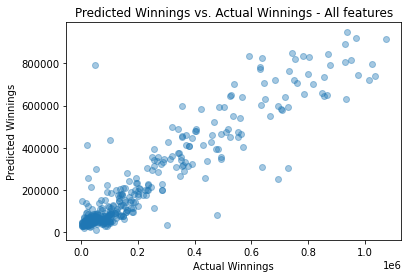

Predicting Winnings with all features, Train Score: 0.840335219055234
Predicting Winnings with all features, Test Score: 0.8473449352802542
Coefficient:  0        39820
1        17334
2       109827
3         9761
4        32879
         ...  
1716      9117
1717     89755
1718     44566
1719     17527
1720      8869
Name: Winnings, Length: 1721, dtype: int64
Coefficient:  [142769.80722172 414095.5656188   48377.59403246 918703.69801614
  46974.47720735  27604.36421407 255982.28284199 361681.88299771
  47187.49890747  88497.64829314   9438.41774182  47472.46085803
 175825.99637969  56731.64222408 347002.17022643 177340.01201471
 124172.1617492  723419.62478646 239857.01618905 409176.44950725
  50154.93939435  48842.55647487 785602.46488839  67451.94774134
 893542.24495681  64441.39780388  95357.24616054 850624.98668175
 654652.91620236  70056.44950081  39673.27502481  50437.89475959
  76655.84532855  44545.4925059   47951.37733846  65509.6745582
 212391.10192963 121979.7055882  355032.

<Figure size 432x288 with 0 Axes>

In [94]:
#multiple linear regression - All features
features = tennis_players_stats[['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon', 'BreakPointsFaced', 'BreakPointsSaved', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalServicePointsWon', 'FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsOpportunities', 'BreakPointsConverted','ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'TotalPointsWon']]
winnings = tennis_players_stats['Winnings']

#train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

#create and train model on training data
model = LinearRegression()
model.fit(features_train, winnings_train)

#make predictions with model
winnings_predicted = model.predict(features_test)

#plot predicted winnings vs actual winnings
plt.scatter(winnings_test, winnings_predicted, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - All features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

##evaluating model's accuracy
#score model on train data
print('Predicting Winnings with all features, Train Score:', model.score(features_train, winnings_train))

#score model on test data
print('Predicting Winnings with all features, Test Score:', model.score(features_test, winnings_test))
print('Coefficient: ', winnings)
print('Coefficient: ', winnings_predicted)